In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, SimpleRNN, RNN
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
# Load Data
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
start = dt.datetime(1994, 1, 1)
end = dt.datetime(2017, 9, 15)
#df = web.DataReader('^GSPC', "yahoo", start, end)
df = pd.read_csv('E:/Academics/courses/5th/project/proj/^GSPC.csv')
df['Close'].to_csv('S&P.csv',index=False)

X_train, y_train, X_test, y_test = lstm.load_data('S&P.csv', 50, True)

In [30]:
X_train.shape

(15340, 50, 1)

In [3]:
# Build Model
from keras import metrics
from keras.optimizers import Nadam
import keras.backend as K
import numpy as np

model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    840,
    activation = 'tanh',
    recurrent_activation = 'hard_sigmoid',
    return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(
    840,
    activation = 'tanh',
    recurrent_activation = 'hard_sigmoid',
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1,
    ))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
print('compilation time : ', time.time() - start)

compilation time :  0.040106773376464844


In [ ]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=1000,
    nb_epoch=5,
    validation_split=(0.05)
    )



Train on 14573 samples, validate on 767 samples
Epoch 1/5
14573/14573 [==============================] - 1126s 77ms/step - loss: 0.0013 - acc: 0.0011 - val_loss: 3.6785e-04 - val_acc: 0.0013
Epoch 2/5
14573/14573 [==============================] - 1164s 80ms/step - loss: 3.4830e-04 - acc: 0.0011 - val_loss: 2.6252e-04 - val_acc: 0.0013
Epoch 3/5
14573/14573 [==============================] - 1134s 78ms/step - loss: 2.7043e-04 - acc: 0.0011 - val_loss: 2.3163e-04 - val_acc: 0.0013
Epoch 4/5
14573/14573 [==============================] - 1088s 75ms/step - loss: 2.4455e-04 - acc: 0.0011 - val_loss: 2.2057e-04 - val_acc: 0.0013
Epoch 5/5
 6000/14573 [===========>..................] - ETA: 6:31:31 - loss: 2.3560e-04 - acc: 0.0013

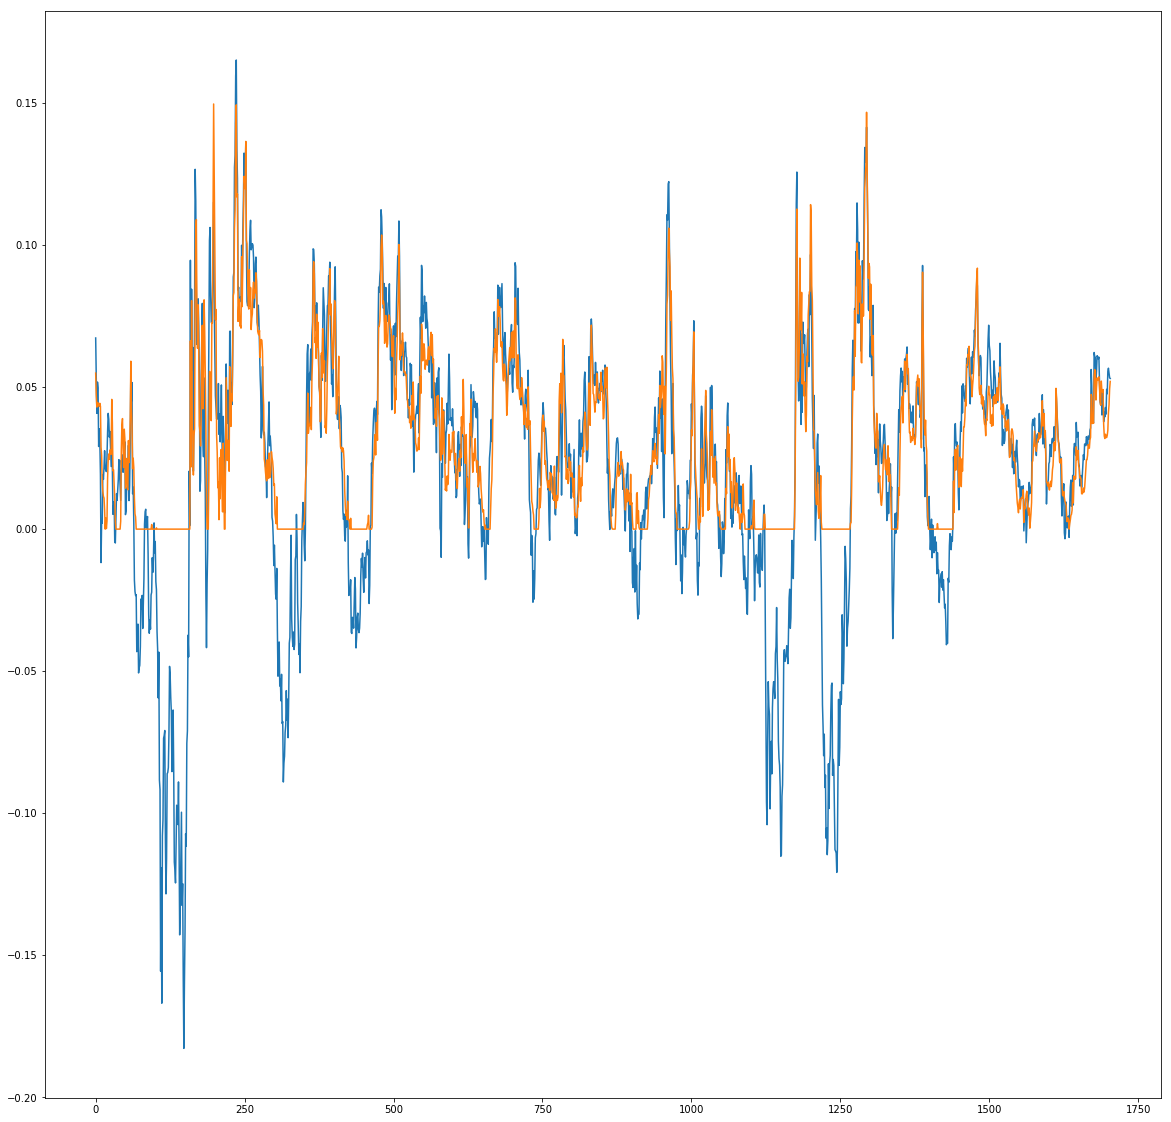

In [38]:
import matplotlib.pyplot as plt
import numpy as np

#predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
#lstm.plot_results_multiple(predictions, y_test, 50)
#print(X_test)
predicted = model.predict(X_test)
predicted = np.reshape(predicted,(predicted.size,))
plt.figure(figsize=(20,20))
plt.plot(y_test)
plt.plot(predicted)
plt.show()

In [ ]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
start = dt.datetime(1994, 1, 1)
end = dt.datetime(2017, 9, 15)
df = web.DataReader('AAPL', "yahoo", start, end)
df['Close'].to_csv('S&P.csv',index=False)

X_train, y_train, X_test, y_test = lstm.load_data('S&P.csv', 50, True)